Мышковец С.А., v.01 12.10.2022

Решение задачи: Анализ данных Real estate valuation data set.

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
    
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

Пробуем написать вывод по полученным результатам. 


Вывод: 

# Data Set Description

Data Set Information:
- The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The â€œreal estate valuationâ€ is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).


Attribute Information:
The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

data = pd.read_excel('Real estate valuation data set.xlsx')
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
data.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


# Анализ исходных данных

In [3]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
(data['X2 house age']==0).value_counts()

False    397
True      17
Name: X2 house age, dtype: int64

In [6]:
(data['X4 number of convenience stores']==0).value_counts()

False    347
True      67
Name: X4 number of convenience stores, dtype: int64

Значений NaN в таблице нет, но есть нулевые значения в колонках X2 house age (17) и X4 number of convenience stores(67).

Опционно можно модифицировать колонку X1 transaction date и привести значения к формату date.

- X2 house age: откинуть строки с нулевым значением, проверить, на сколько влияет возраст здания на его стоимость и принять решение, надо ли заполнять поля средними значениями.
- X4 number of convenience stores: количество нулевых значений значительно (16%), изменяем нудевые значения на среднеарифметические.
    Решение принято, учитывая следующие факты:
    - Тайвань находиться на 10-м месте в мире по плотности населения, бо́льшая часть которого живёт в городских агломерациях; 
    - Тайвань имеет развитую капиталистическую экономику, которая занимает 30-е место в мире по величине паритета покупательной способности (ППС), 18-е место по валовому внутреннему продукту (ВВП), по паритету покупательной способности на душу населения и 24-е по номинальному ВВП, инвестициям и внешней торговле;
    - Экономика Тайваня характеризуется высокой концентрацией бакалей;
    
    

# Добавляем колонку с модифицированными датами, удобными для чтением человеком.

In [7]:
from datetime import date

In [8]:
dtlt = []

for a in data['X1 transaction date']:
    year = int(a)
    month = int(12 * (a - year))
    if month == 0:
        month = 1
    new_a = date(year, month, 1)
    dtlt.append(new_a)

data.insert(2,'date_modified', dtlt)
# data['date_modified'] = dtlt

In [9]:
data.head()

,No,X1 transaction date,date_modified,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,2012-11-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,2012-11-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,2013-06-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,2013-06-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,2012-09-01,5.0,390.56840,5,24.97937,121.54245,43.1


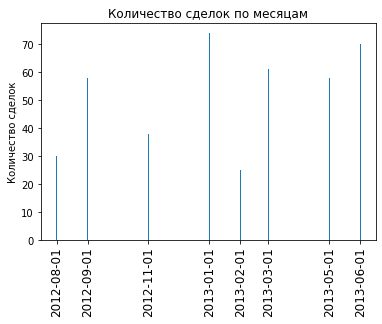

In [10]:
def dict_sort(my_dict):
    """"
    Функция сортирует словарь по значениям в убывающем порядке и возвращает отсортированные список ключей и соответсвуюущий ему по порядку следования элементов список значений.
    """
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)
date_modified_count = pd.value_counts(data['date_modified'].values, sort=True)
date_modified_count_keys, date_modified_count_values = dict_sort(dict(date_modified_count))    
plt.title('Количество сделок по месяцам')
plt.bar(date_modified_count_keys, date_modified_count_values)
plt.xticks(date_modified_count_keys, rotation=90, fontsize=12)
plt.ylabel('Количество сделок')
plt.show()

Количество сделок по месяцам значительно колеблется. 
Проверить взаимосвязь месяц сделки/стоимость.

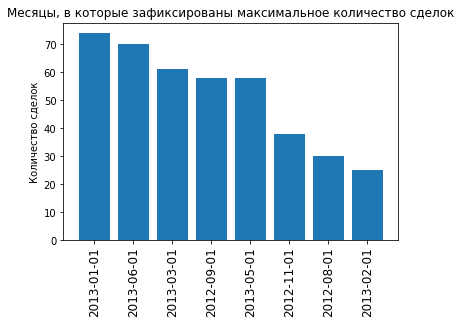

In [11]:
date_modified_count = pd.value_counts(data['date_modified'].values, sort=True)
date_modified_count_keys, date_modified_count_values = dict_sort(dict(date_modified_count))    
TOP_DATE = len(date_modified_count_keys)
plt.title('Месяцы, в которые зафиксированы максимальное количество сделок')
plt.bar(np.arange(TOP_DATE), date_modified_count_values)
plt.xticks(np.arange(TOP_DATE), date_modified_count_keys, rotation=90, fontsize=12)
plt.ylabel('Количество сделок')
plt.show()

Выявить зависимость стоимости от сезона невозможно из-за короткого периода наблюдений.

# Заменяем нулевые значения в колонке X4 number of convenience stores на среднеарифметические.

In [12]:
data['X4 number of convenience stores'].mean()


4.094202898550725

In [13]:
data['X4 number of convenience stores'] = data['X4 number of convenience stores'].replace(0, data['X4 number of convenience stores'].mean())

In [14]:
data['X4 number of convenience stores'].min()

1.0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   date_modified                           414 non-null    object 
 3   X2 house age                            414 non-null    float64
 4   X3 distance to the nearest MRT station  414 non-null    float64
 5   X4 number of convenience stores         414 non-null    float64
 6   X5 latitude                             414 non-null    float64
 7   X6 longitude                            414 non-null    float64
 8   Y house price of unit area              414 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 29.2+ KB


In [16]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.756791,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.348810,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,1.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,3.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.094203,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Удаляем нулевые значения в колонке X2 house age.

In [17]:
data.drop(data[data['X2 house age'] == 0].index, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      397 non-null    int64  
 1   X1 transaction date                     397 non-null    float64
 2   date_modified                           397 non-null    object 
 3   X2 house age                            397 non-null    float64
 4   X3 distance to the nearest MRT station  397 non-null    float64
 5   X4 number of convenience stores         397 non-null    float64
 6   X5 latitude                             397 non-null    float64
 7   X6 longitude                            397 non-null    float64
 8   Y house price of unit area              397 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 31.0+ KB


# Ищем выбросы.

<AxesSubplot:>

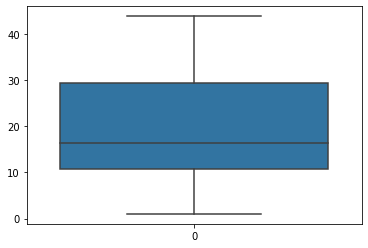

In [19]:
sns.boxplot(data=data['X2 house age'], width=0.8)

<AxesSubplot:>

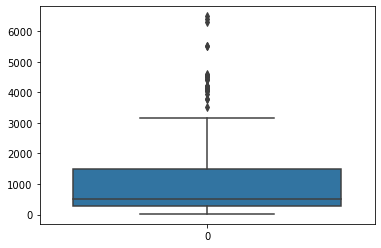

In [20]:
sns.boxplot(data=data['X3 distance to the nearest MRT station'], width=0.8)

Проверила выбросы по google maps. Это не выбросы, а реальное расстояние до ближайших станций метро.

<AxesSubplot:>

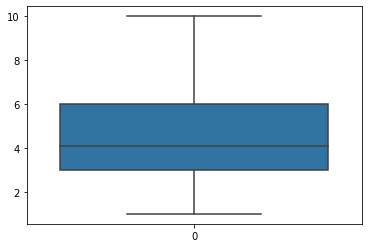

In [21]:
sns.boxplot(data=data['X4 number of convenience stores'], width=0.8)

<AxesSubplot:>

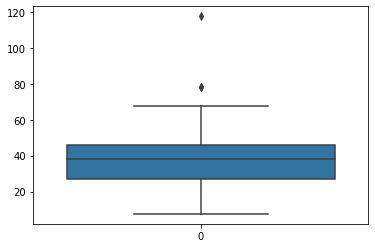

In [22]:
sns.boxplot(data=data['Y house price of unit area'], width=0.8)

Максимальная стоимость за единицу 121,48458 встречается 1 раз, недвижимость расположена в одном из самых крупных мегаполисов. Выброс удалять не буду.

<AxesSubplot:xlabel='X5 latitude', ylabel='X6 longitude'>

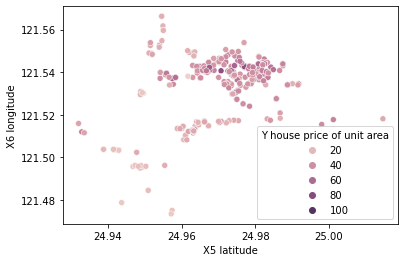

In [23]:
sns.scatterplot(x=data['X5 latitude'], y=data['X6 longitude'], hue=data['Y house price of unit area'])

(array([28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48.]),
 [Text(0, 28.0, '28'),
  Text(0, 30.0, '30'),
  Text(0, 32.0, '32'),
  Text(0, 34.0, '34'),
  Text(0, 36.0, '36'),
  Text(0, 38.0, '38'),
  Text(0, 40.0, '40'),
  Text(0, 42.0, '42'),
  Text(0, 44.0, '44'),
  Text(0, 46.0, '46'),
  Text(0, 48.0, '48')])

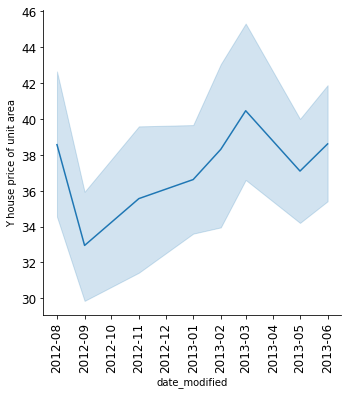

In [24]:
g = sns.relplot(x='date_modified', y='Y house price of unit area', data=data, kind='line')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

Удаляем столбец 'date modified' и "No" для скалирования данных.

In [25]:
del data["date_modified"]
del data["No"]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     397 non-null    float64
 1   X2 house age                            397 non-null    float64
 2   X3 distance to the nearest MRT station  397 non-null    float64
 3   X4 number of convenience stores         397 non-null    float64
 4   X5 latitude                             397 non-null    float64
 5   X6 longitude                            397 non-null    float64
 6   Y house price of unit area              397 non-null    float64
dtypes: float64(7)
memory usage: 41.0 KB


# Удаляем выбросы (удаляем все данные, которые не находятся в пределах 3х стандартных отклонений).

Учитывая информацию выше, я бы выьросы не удаляла. Сделал, чтобы потренироваться.

In [27]:
data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     397 non-null    float64
 1   X2 house age                            397 non-null    float64
 2   X3 distance to the nearest MRT station  397 non-null    float64
 3   X4 number of convenience stores         397 non-null    float64
 4   X5 latitude                             397 non-null    float64
 5   X6 longitude                            397 non-null    float64
 6   Y house price of unit area              397 non-null    float64
dtypes: float64(7)
memory usage: 41.0 KB


In [29]:
corr_matrix = data.corr()
corr_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,-0.012901,0.049279,0.009452,0.029585,-0.044130,0.103031
X2 house age,-0.012901,1.000000,-0.019501,0.071172,0.072317,-0.032181,-0.145210
X3 distance to the nearest MRT station,0.049279,-0.019501,1.000000,-0.464387,-0.595022,-0.810694,-0.676954
X4 number of convenience stores,0.009452,0.071172,-0.464387,1.000000,0.309935,0.376912,0.496409
X5 latitude,0.029585,0.072317,-0.595022,0.309935,1.000000,0.414140,0.553726
X6 longitude,-0.044130,-0.032181,-0.810694,0.376912,0.414140,1.000000,0.526905
Y house price of unit area,0.103031,-0.145210,-0.676954,0.496409,0.553726,0.526905,1.000000


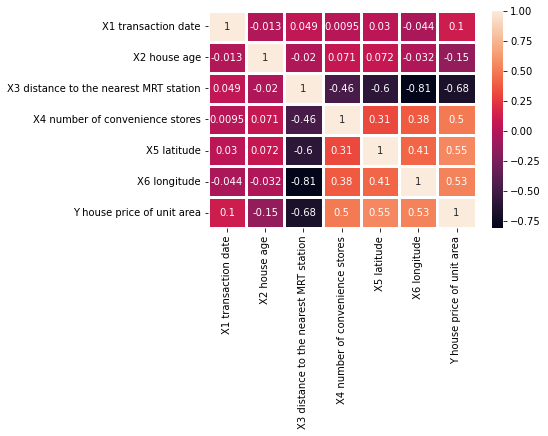

In [30]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, linewidths=3);

Ярко выраженных связей не выявлено.

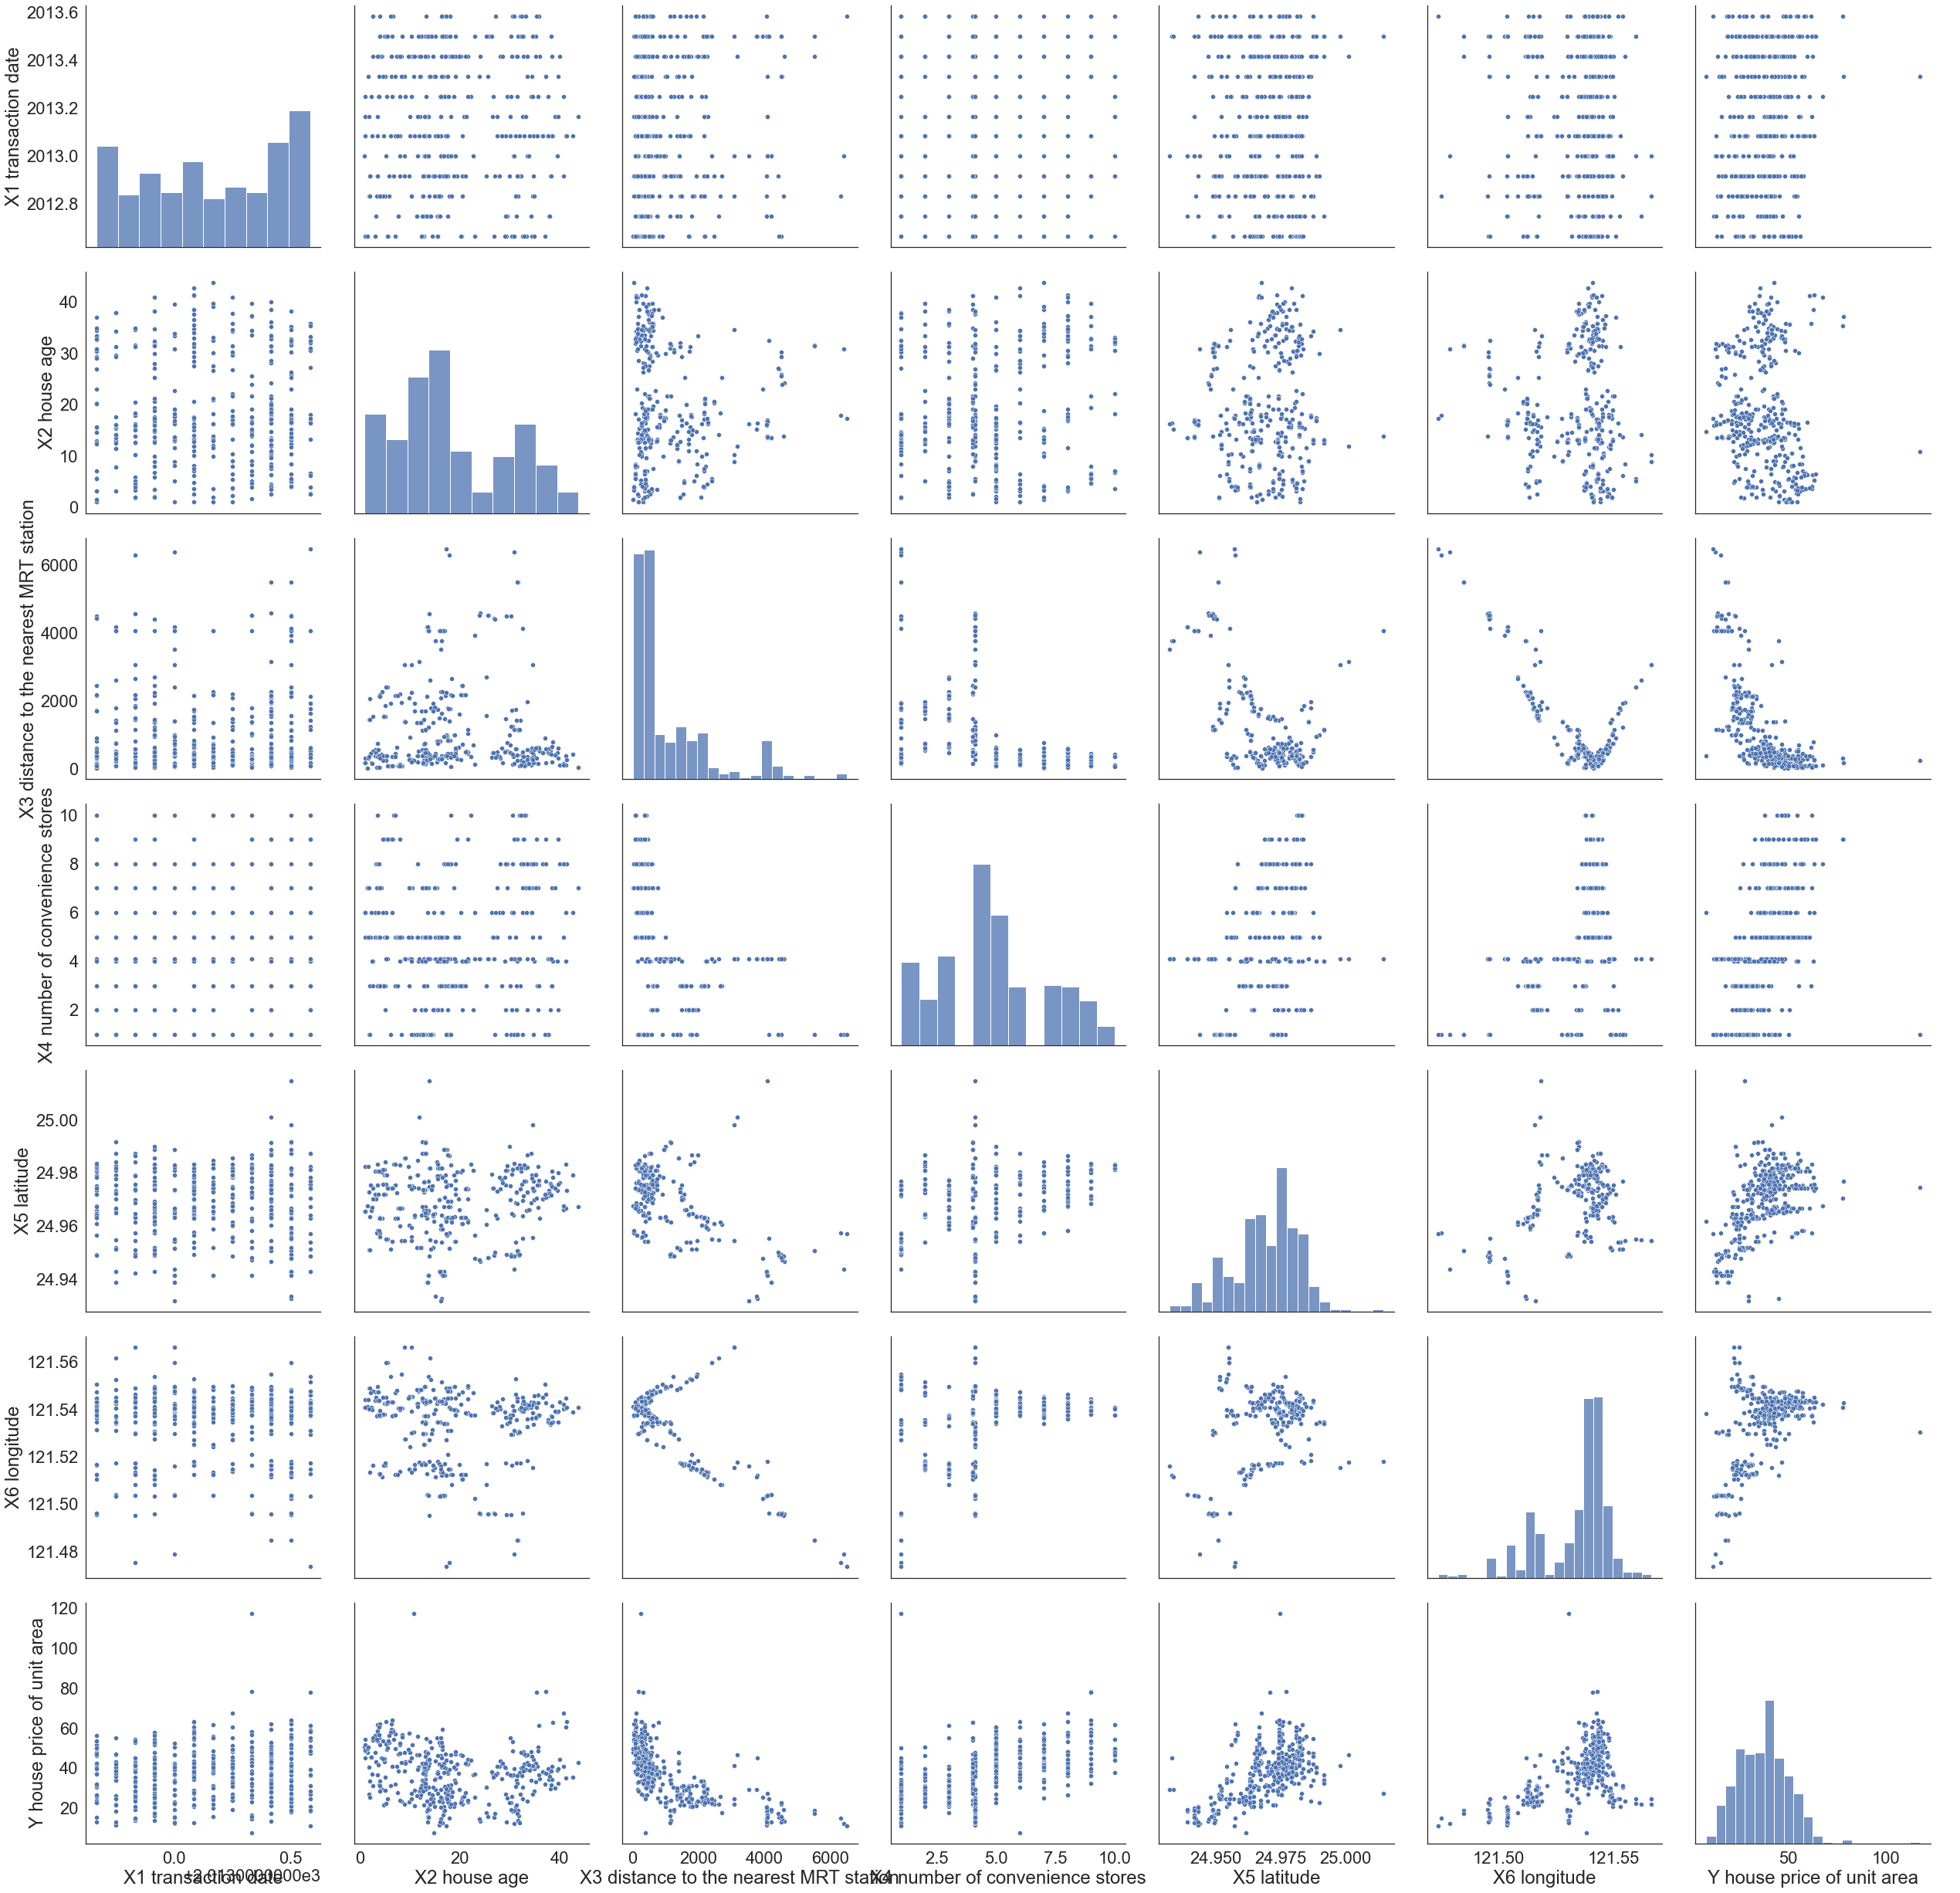

In [31]:
sns.set(style='white', font_scale=2)
g = sns.PairGrid(data, height=5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Скалируем данные.

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scalerminmax = MinMaxScaler(feature_range=(-1,1)) 
filt_data = scaler.fit_transform(data)

In [33]:
filt_data

array([[-0.84727966,  1.22985674, -0.81128202, ...,  1.11778267,
         0.4531519 ,  0.0461297 ],
       [-0.84727966,  0.09353872, -0.63741778, ...,  0.90787434,
         0.40628421,  0.37046254],
       [ 1.52989373, -0.47007502, -0.43714727, ...,  1.47399074,
         0.6887744 ,  0.75513637],
       ...,
       [ 0.34130704,  0.02990491, -0.57125302, ...,  0.81961743,
         0.42875502,  0.24978055],
       [-0.55013307, -0.94278331, -0.79565239, ..., -0.17347158,
         0.4807589 ,  1.14735283],
       [ 1.23274714, -1.08823202, -0.80690848, ...,  0.43001486,
         0.63677052,  2.00721198]])

# Строим гистограммы распределения.

Y house price of unit area

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


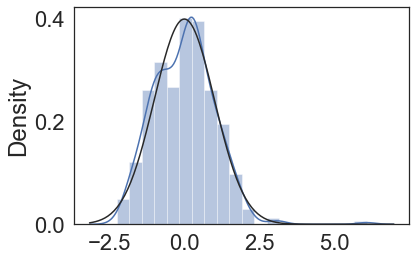

In [34]:
sns.distplot(filt_data[:,-1], fit=norm, bins = 20);

X4 number of convenience stores

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


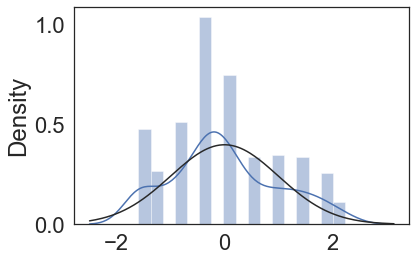

In [35]:
sns.distplot(filt_data[:,-4], fit=norm, bins = 17);

X3 distance to the nearest MRT station

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


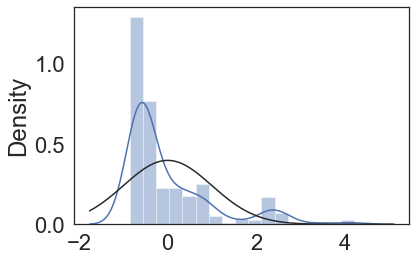

In [36]:
sns.distplot(filt_data[:,-5], fit=norm, bins = 17);

X2 house age

C:\Users\myshk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


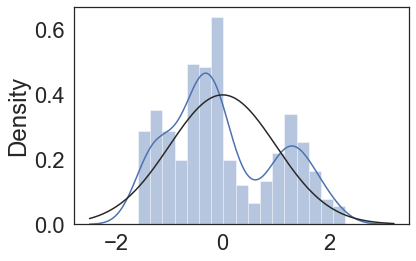

In [37]:
sns.distplot(filt_data[:,-6], fit=norm, bins = 17);

# Тест на нормальность

Тест Шапиро-Уилк

In [2]:
from scipy import stats
import scipy
stat, p = stats.shapiro(data['Y house price of unit area'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

NameError: name 'df' is not defined

Критерий согласия Пирсона 

In [39]:
stat, p = stats.normaltest(data['Y house price of unit area'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=13.639, p-value=0.001
Отклонить гипотезу о нормальности
